# Premiere question : comment sont associés les secteurs d'émission et les faisceaux de réception ?



In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pyat.core.xsf.xsf_constants as cst
from pyat.playground.stage.utils.time_utils import secondToNanoF, nano_todatetime, floatsecond_tonano_array
from pyat.core.xsf.xsf_reader import XSFReader

plt.rcParams['figure.dpi'] = 200

In [3]:
file="d:/XSF/0009_20100625_144640_200kHz_beta.xsf.nc"

Fichier 2040 single head

In [6]:
file="d:/XSF/0011_20180908_150242.xsf.nc"
reader = XSFReader(file)
sector_per_beam=reader.get_variable(cst.RootGrp.SonarGrp.BeamGroup1Grp.BEAM_SECTOR)
plt.figure()
#plt.xlim(100,140)
plt.ylim(100,125)
plt.grid()
s=plt.imshow(sector_per_beam)

FileNotFoundError: [Errno 2] No such file or directory: b'd:/XSF/0011_20180908_150242.xsf.nc'

In [4]:
file="d:/XSF/0198_20190510_111055_EM122_Marion_Dufresne.xsf.nc"
reader = XSFReader(file)


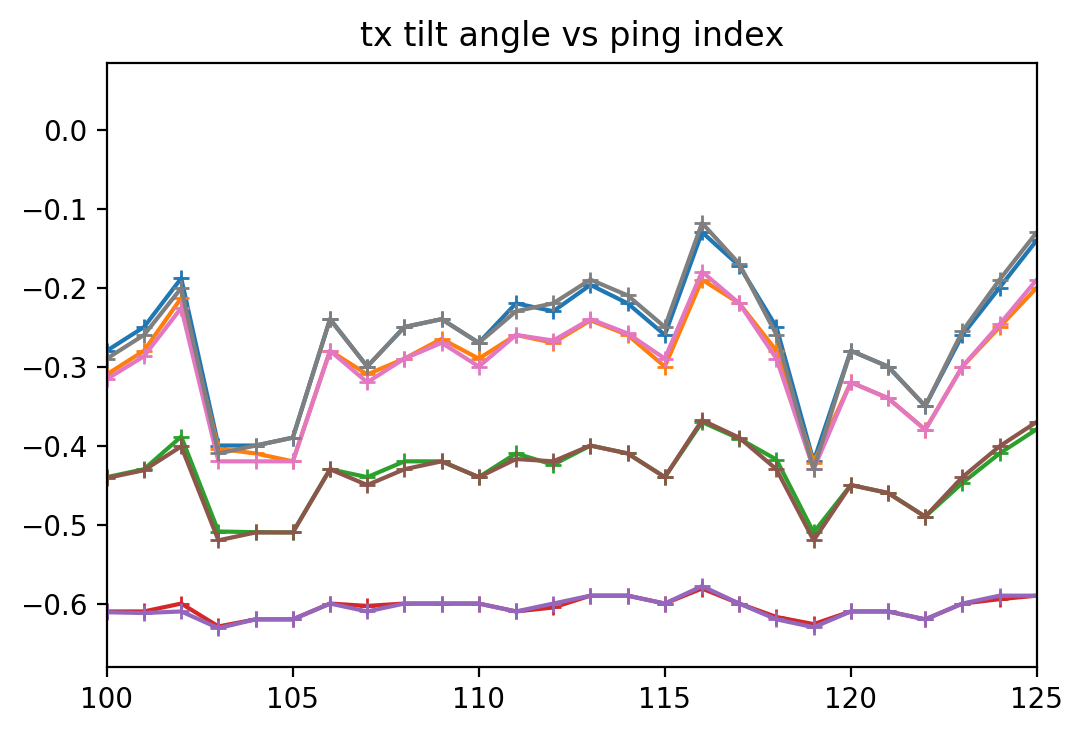

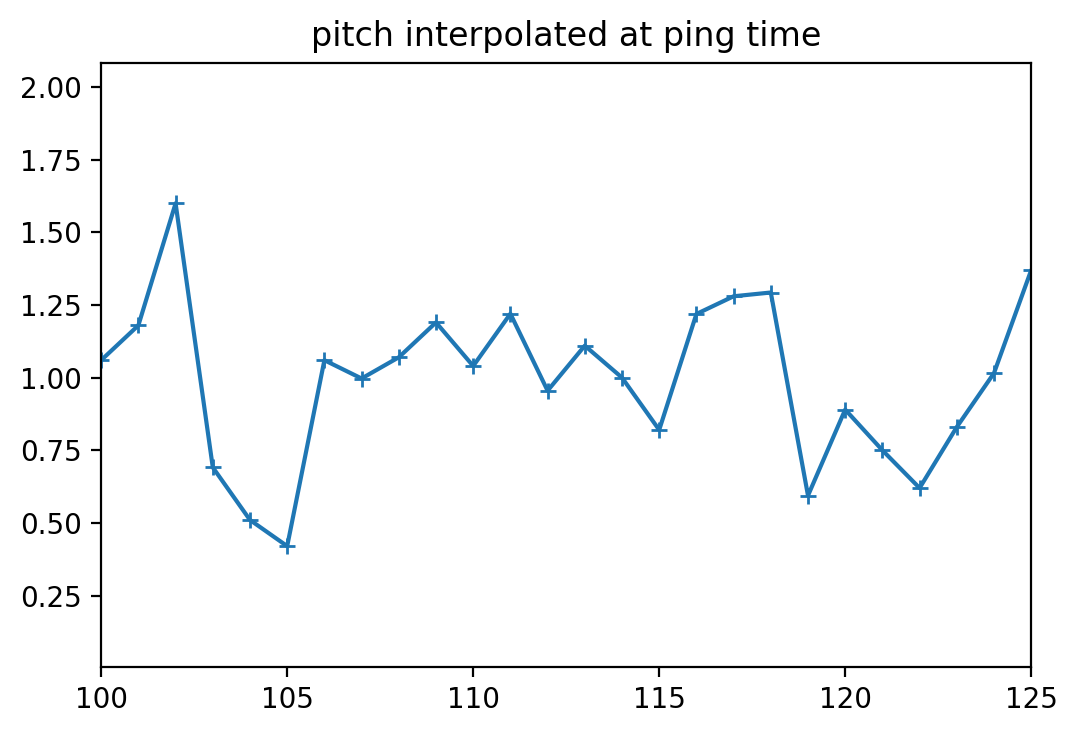

In [5]:

#Vérification des tx angle en fonction du pitch au moment d'emission
tx_tilt_angle=reader.get_variable(cst.RootGrp.SonarGrp.BeamGroup1Grp.TX_BEAM_ROTATION_THETA)
pitch_atping_time= reader.get_variable(cst.RootGrp.SonarGrp.BeamGroup1Grp.PLATFORM_PITCH)[:]

plt.xlim(100,125)
plt.title("tx tilt angle vs ping index (zoom) ")
tilts_per_tx=plt.plot(tx_tilt_angle,marker="+")

plt.figure()
plt.xlim(100,125)
plt.title("pitch interpolated at ping time")
pitches=plt.plot(pitch_atping_time,marker="+")


Le tilt angle semble corrélé au roulis, toutefois on aurait pu s'attendre à une série de dépointage constants suivant les secteurs ce qui n'est pas le cas. 
Note : TX_BEAM_ROTATION_THETA = BeamGroup1VendorSpecificGrp.RAW_TX_BEAM_TILT_ANGLE + roulis à l'instant d'émission

In [6]:
tx_time_offset= reader.get_variable(cst.RootGrp.SonarGrp.BeamGroup1Grp.BeamGroup1VendorSpecificGrp.TRANSMIT_TIME_DELAY)[
                        :, :]
print(tx_time_offset[0,:])

[1.20298535e-01 7.54985362e-02 3.06985378e-02 3.81842256e-08
 1.29990382e-02 5.30985370e-02 9.78985280e-02 1.42698541e-01]


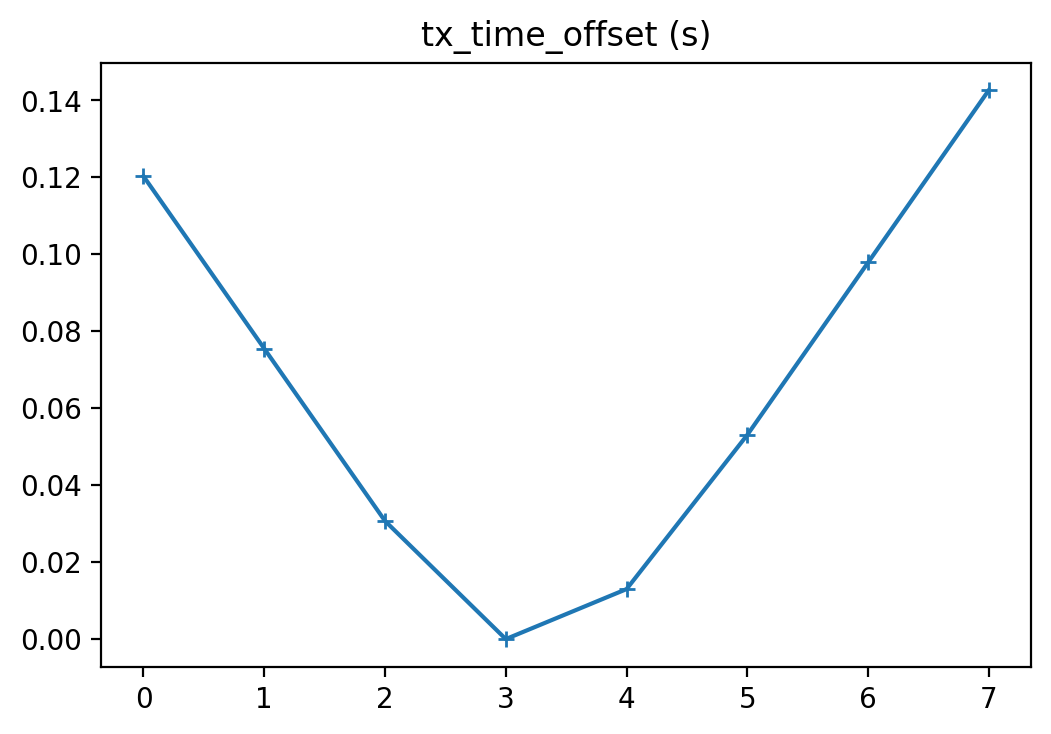

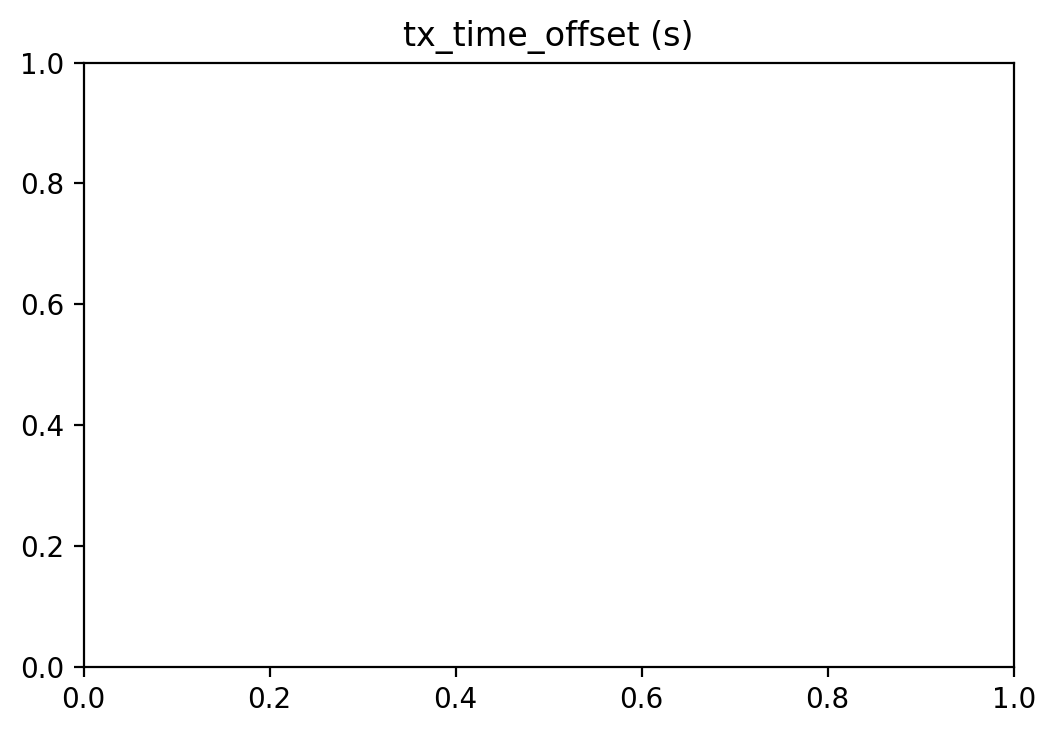

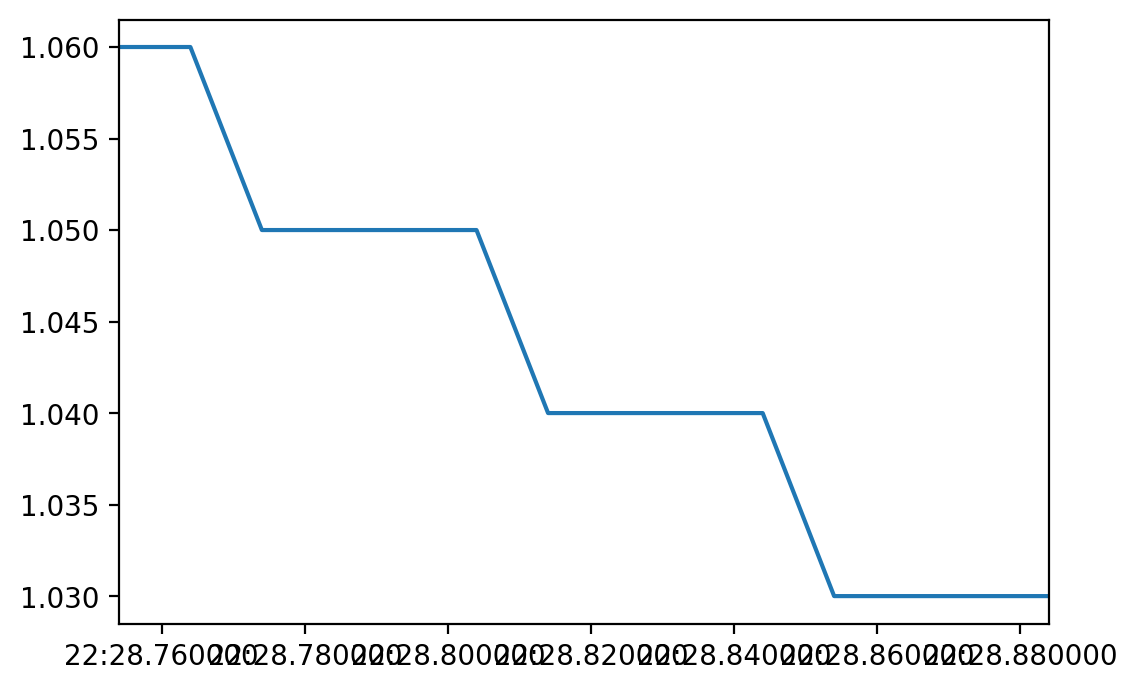

In [7]:
#retrieve High frequency data
hf_time= reader.get_variable(cst.RootGrp.PlatformGrp.AttitudeGrp.AttitudeSubGroup.TIME)[:]
hf_pitch= reader.get_variable(cst.RootGrp.PlatformGrp.AttitudeGrp.AttitudeSubGroup.PITCH)[:]

from pyat.playground.stage.utils.time_utils import secondToNanoF, nano_todatetime, floatsecond_tonano_array
#let's consider one ping
slice_index=100
tx_time_offset= reader.get_variable(cst.RootGrp.SonarGrp.BeamGroup1Grp.BeamGroup1VendorSpecificGrp.TRANSMIT_TIME_DELAY)[
                        slice_index, :]
tx_theta_angle= reader.get_variable(cst.RootGrp.SonarGrp.BeamGroup1Grp.TX_BEAM_ROTATION_THETA)[
                        slice_index, :]
ping_time=reader.get_variable(cst.RootGrp.SonarGrp.BeamGroup1Grp.PING_TIME)[slice_index]

tx_times= ping_time+ floatsecond_tonano_array(tx_time_offset)

plt.title("tx_time_offset (s)")
plt.plot(tx_time_offset,marker='+')

plt.figure()
plt.title("tx_time_offset (s)")

min_time = np.min(tx_times)
max_time = np.max(tx_times)

min_hf_index = np.argmin(np.abs(hf_time-min_time))
max_hf_index = np.argmin(np.abs(max_time-hf_time))

hf_time=hf_time[min_hf_index:max_hf_index:]
hf_pitch = hf_pitch[min_hf_index:max_hf_index:]
plt.figure()
plt.xlim(nano_todatetime(hf_time[0]),nano_todatetime(hf_time[-1]))
plt.plot(nano_todatetime(hf_time),hf_pitch, label='high frequency pitch')
#plt.scatter(nano_todatetime(tx_times),tx_theta_angle,label="tx_theta_angles")

In [2]:
tx_times

NameError: name 'tx_times' is not defined

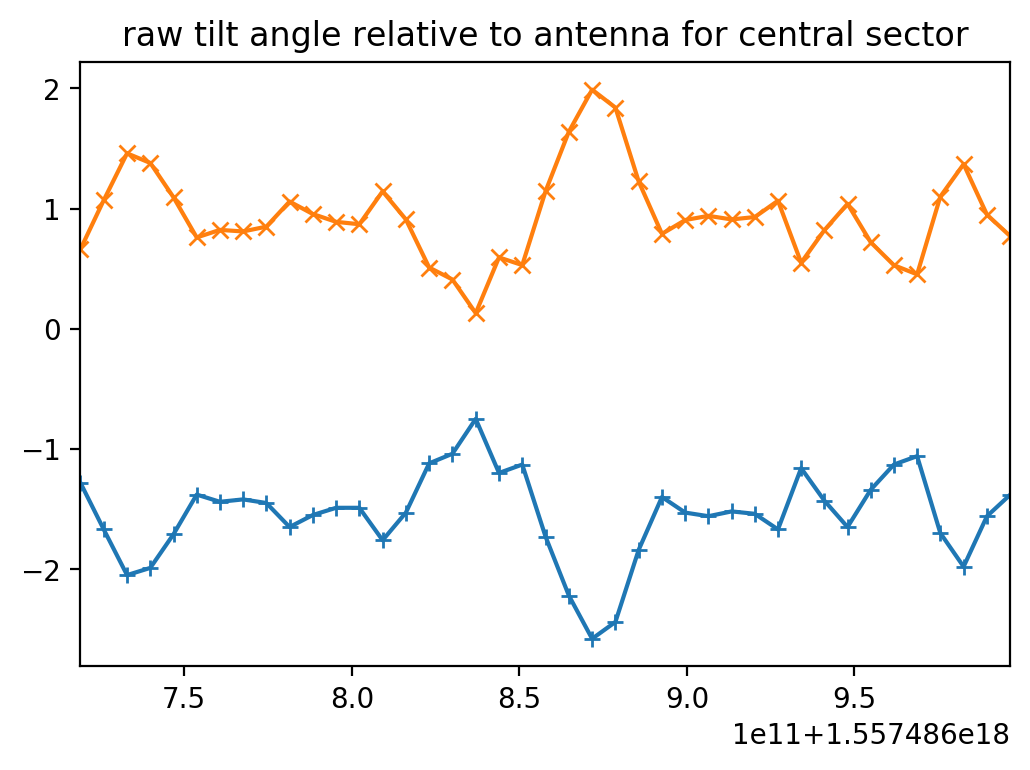

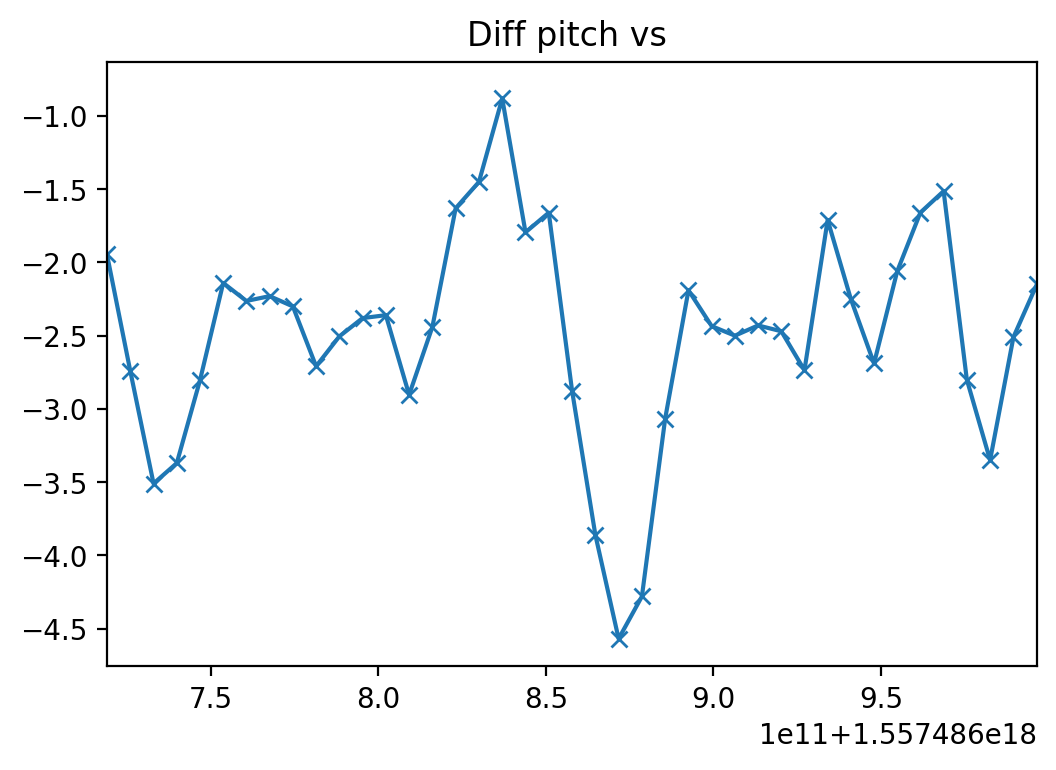

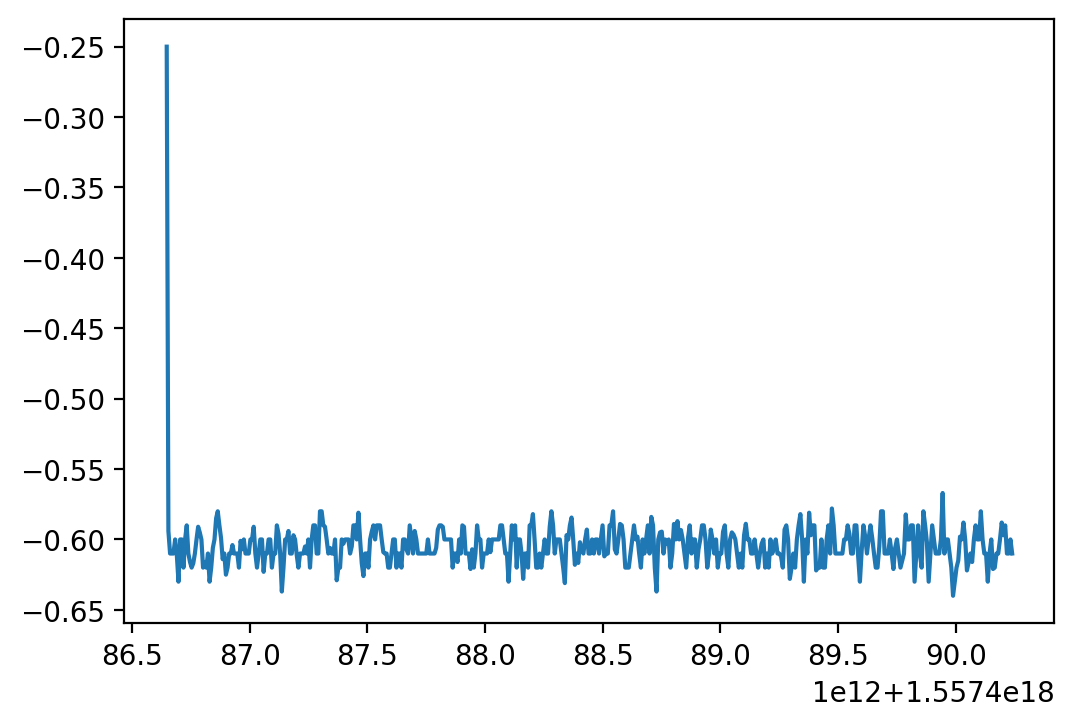

In [20]:

tx_tilt_angle_ref_antenna=reader.get_variable(cst.RootGrp.SonarGrp.BeamGroup1Grp.BeamGroup1VendorSpecificGrp.RAW_TX_BEAM_TILT_ANGLE)
tx_tilt_angle_ref_vertical=reader.get_variable(cst.RootGrp.SonarGrp.BeamGroup1Grp.TX_BEAM_ROTATION_THETA)
ping_time=reader.get_variable(cst.RootGrp.SonarGrp.BeamGroup1Grp.PING_TIME)

tx_index=3

t=tx_tilt_angle_ref_antenna[:,tx_index]
t=t.reshape(-1,1)
plt.figure()
plt.title("raw tilt angle relative to antenna for central sector")
plt.xlim(ping_time[10],ping_time[50])
lines=plt.plot(ping_time,t,marker='+')

pitch_atping_time= reader.get_variable(cst.RootGrp.SonarGrp.BeamGroup1Grp.PLATFORM_PITCH)[:]
plt.plot(ping_time,pitch_atping_time,marker='x',label="pitch")

plt.figure()
plt.xlim(ping_time[10],ping_time[50])

plt.title("Diff pitch vs ")
plt.plot(ping_time,t-pitch_atping_time.reshape(-1,1),marker='x',label="minus pitch")

#plt.plot(ping_time,t+pitch_atping_time.reshape(-1,1))

plt.figure()
plt.plot(ping_time,tx_tilt_angle_ref_vertical[:,tx_index],label="tx_angle_ref_vertical")




# Seconde question : vérifier que le tilt angle est bien compensé du pitch à l'instant d'émission de chaque secteur ?


# Troisième question : comment est compensé du roulis la formation du lobe image à la réception ? 

hypothèse : compensation du roulis à l'instant d'émission (moyen ? par secteur ? )  puis on ne touche plus au roulis lors de la réception

Voir comment confirmer les hypothèses

Reprendre les fichiers fugro avec les soucis d'ampli et les utiliser pour valider les hypotheses

